# Plane wave decomposition - Example 2 - Fraunhofer diffraction


## Purpose

Computation of diffraction patterns in the Fraunhofer approximation through any screen apertures with a known transparency function 

<img src="../img/Fraunhofer picture.png" width="650" height="320">

In the Fraunhofer approximation, the diffraction pattern is observed in free space in farfield at M(x',y',z'=r) a distance $k_0r>>1$. In this situation the plane wave decomposition (PWD) of a scalar field reduces to $$\psi(x',y',z)=\iint_{-\infty }^{\infty }A(k_x,k_y)e^{j(k_x x'+k_y y' +k_z z)}dk_xdk_y  \\ \simeq \frac{j}{k}\frac{e^{jkr}}{r} \iint \psi(x,y,z=0)e^{j(k_x x+k_y y )}dxdy   \\ =\frac{j}{k}\frac{e^{jkr}}{r} \iint\psi(x,y,z=0)e^{jk({{x'x} \over r }+{{y'y} \over r } y )}dxdy \\ = \frac{j}{k}\frac{e^{jkr}}{r} A(k {x' \over r }, k{ y' \over r})$$
$A(k {x' \over r }, k{ y' \over r})$ is the angular spectrum of the field in the $z=0$ plane.
This angular spectrum is directly computed with the FFT algorithm : $$ A(k_x,k_y) =TF\left\{ \psi(x,y,z=0) \right\} \tag{2}$$ 
So finally the Fraunhofer diffraction pattern appears to be 
directly proportional to the angular spectrum of the field in $z=0$ plane.
The only thing we have to consider here is that only spatial frequencies included in a disk of radius  $$k_0 = \sqrt {k_x^2+k_y^2}={2 \pi \over \lambda}$$ have to be taken into account in the Fraunhofer angular spectrum. So we simply cutoff the the evanescent part of the angular spectrum by using an hat filter. 




In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


### Some general parameters

In [2]:
u = 1         # length unit, e.g. 1 µm
wlen = 1* u      # wavelength in unit of u
N=1001         # odd number of points in the screen 
size = 40*wlen   # size of the screen where the nearfield signal will be defined
distance = 2*wlen  # observation plane in the farfield


### Creating the transparency function of the nearfield pattern $\psi(x,y,z=0)$ 
here we define a rectangular and a circular apertures

369

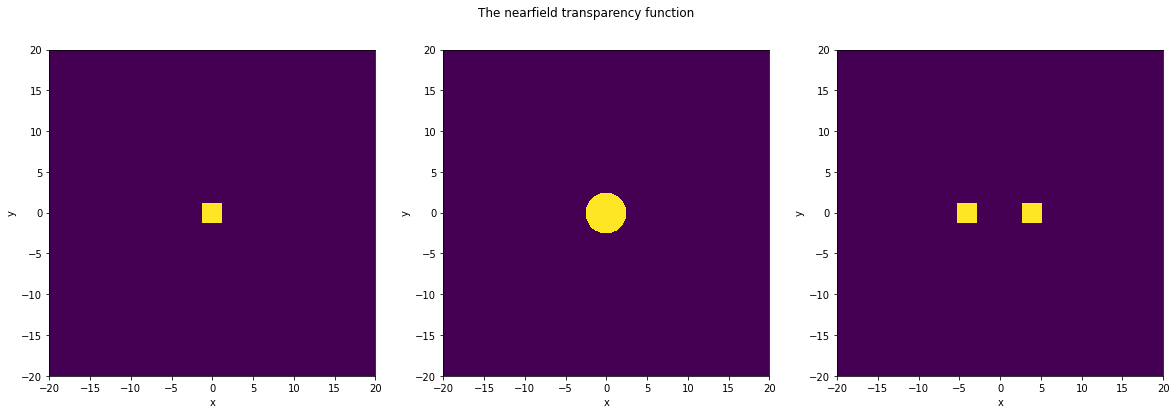

In [3]:
width = 2.5*wlen            # width of the aperture
height = 2.5*wlen           # height of the aperture
widthpix = int(N*width/size)         # width in pixel 
heightpix = int(N*height/size)       # height in pixel
D=4*wlen
Dpix = int(N*D/size)  #separation distance in pixels
x = np.linspace(-size/2,size/2,N)*u
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)
sig = np.zeros((N,N))
sig2 = np.zeros((N,N))
sig3 = np.zeros((N,N))
sig[int((N-1)/2-heightpix/2):int((N-1)/2+heightpix/2),int((N-1)/2-widthpix/2):int((N-1)/2+widthpix/2)] = 1
sig2[np.where(R<2.5*wlen)]=1
sig3[int((N-1)/2-heightpix/2):int((N-1)/2+heightpix/2),int((N-1)/2-Dpix-widthpix/2):int((N-1)/2-Dpix+widthpix/2)] = 1
sig3[int((N-1)/2-heightpix/2):int((N-1)/2+heightpix/2),int((N-1)/2+Dpix-widthpix/2):int((N-1)/2+Dpix+widthpix/2)] = 1
# plot the nearfield signal transparency function
fig1, (ax1 ,ax2, ax3)= plt.subplots(1,3,figsize=(20,6))
fig1.suptitle('The nearfield transparency function ')

pcm1=ax1.pcolormesh(x,y,sig)
ax1.axis('square')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

pcm2=ax2.pcolormesh(x,y,sig2)
ax2.axis('square')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

pcm3=ax3.pcolormesh(x,y,sig3)
ax3.axis('square')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
int((N-1)/2-Dpix-widthpix/2)

### Array of spatial frequencies centered on 0, in rad per unit length u:


In [4]:
kx=np.zeros(N,dtype=complex)
freq_array1=np.linspace(-(N-1)/2,(N-1)/2,N)    # normalized spatial freq. in the signal    N -> L 
array2=freq_array1/(np.max(x)-np.min(x));      # spatial freq. in 1/x unit                 2 -> pmin  pmin=2*L/N  -> freqmax=N/2L 
kx = 2*np.pi*array2;                           # angular spatial freq in rad/x_unit  (wavenumber in ur case)
ky = kx  # because the screen is a square array of N by N elements
KX,KY = np.meshgrid(kx,ky)  # definition of grid arrays for vectorization computation
k=2*np.pi/wlen;   # wavenumber in vacuum




### FFT computation

In [5]:
# 1) Simplest expression: the spectrum have 0th freq at first point
#   can't be used here later on, cause we have centered our freq in middle 
#TF=np.fft.fft2(sig) # 


# 2) More common expression: the spectrum have 0th freq in middle
#TF=np.fft.fftshift(np.fft.fft2(sig)) 


#3) like 2) but phase Origin @center, (not @left as both 2 above)
TF=np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(sig)))
TF2=np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(sig2)))
TF3=np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(sig3)))


## The farfield Fraunhofer diffraction pattern

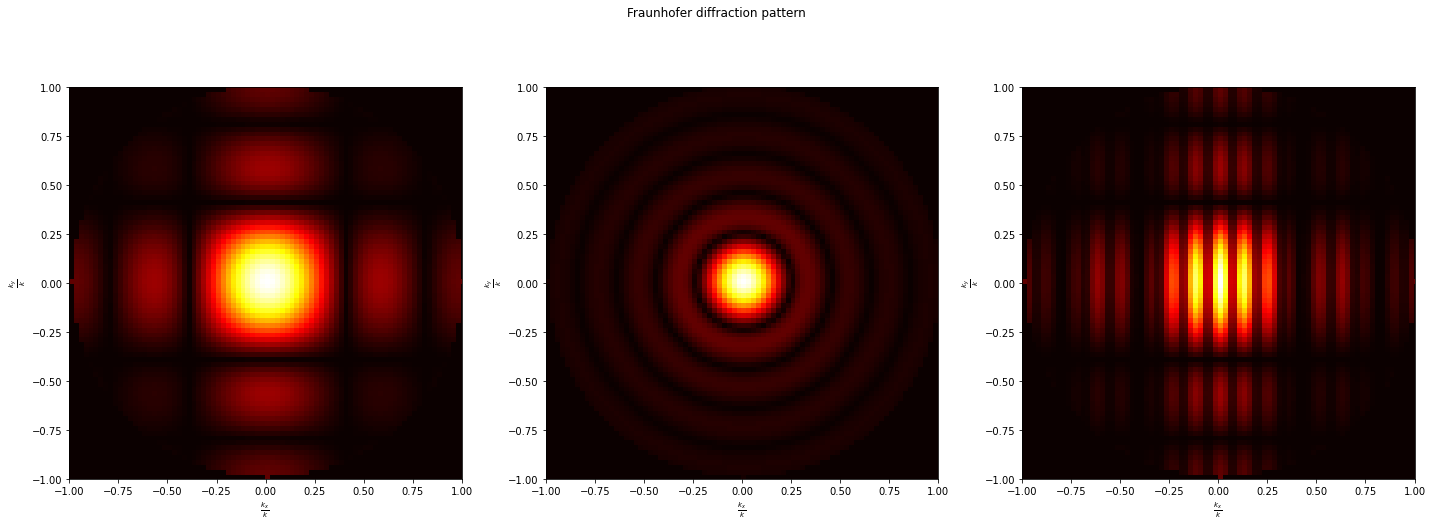

In [6]:
hat=np.zeros((N,N))

KZ=np.sqrt(k**2-KX**2-KY**2+0j) # Array of kz
hat[np.where(np.imag(KZ)==0)]=1
Fraunhofer=(np.abs(TF*hat) )
Fraunhofer2=(np.abs(TF2*hat))
Fraunhofer3=(np.abs(TF3*hat))

fig5, (ax5,ax6,ax7) = plt.subplots(1,3,figsize=(20,8))
fig5.suptitle('Fraunhofer diffraction pattern')

pcm5 = ax5.pcolormesh(kx/k,ky/k,Fraunhofer,cmap='hot')
ax5.axis('square')
ax5.set_xlabel(r'$\frac{k_x}  {k}$ ')
ax5.set_ylabel(r'$\frac{k_y}  {k}$')

ax5.set_xlim([-1,1])
ax5.set_ylim([-1,1])

pcm6 = ax6.pcolormesh(kx/k,ky/k,Fraunhofer2,cmap='hot')
ax6.axis('square')
ax6.set_xlabel(r'$\frac{k_x}  {k}$ ')
ax6.set_ylabel(r'$\frac{k_y}  {k}$')

ax6.set_xlim([-1,1])
ax6.set_ylim([-1,1])

pcm7 = ax7.pcolormesh(kx/k,ky/k,Fraunhofer3,cmap='hot')
ax7.axis('square')
ax7.set_xlabel(r'$\frac{k_x}  {k}$ ')
ax7.set_ylabel(r'$\frac{k_y}  {k}$')

ax7.set_xlim([-1,1])
ax7.set_ylim([-1,1])
fig5.tight_layout()